In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import os
from tpot import TPOTRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import *
from sklearn.svm import *
import re

/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

In [3]:
data = pd.read_csv('../raw_data/data_final_indé_medium.csv')
data

,steam_appid,name,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,days_on_steam,is_a_remake,has_a_website,owner_estimated,score_descriptif,ratio,nb_review,sells_per_days,nb_game_by_publisher,nb_game_by_dev,platforms,indé
0,1002,Rag Doll Kung Fu,fighting multiplayer 1980s realistic real_time...,0.016212,0.016212,0.016212,0.016212,0.401611,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.306578,1,5.99,4949.0,1,1,22451.0,9,0.701754,57,4.536472,1,1,windows,0
1,2710,Act of War: Direct Action,action strategy rts 1980s relaxing,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.687556,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,1,1.99,4067.0,1,0,29159.0,4,0.845070,213,7.169658,98,7,windows,1
2,2720,ThreadSpace: Hyperbol,action strategy space 1980s relaxing,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.438656,0.016197,0.016197,0.016197,0.269795,1,3.99,4311.0,1,1,21720.0,9,0.775000,40,5.038274,16,2,windows,1
3,2780,ARMA: Combat Operations,action simulation shooter fps tactical,0.016200,0.016200,0.016200,0.016200,0.431614,0.016200,0.016200,0.016200,0.016200,0.276788,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,1,5.99,4067.0,1,1,29546.0,8,0.653153,222,7.264814,23,15,windows,0
4,2850,X: Tension,simulation strategy space sci_fi space_sim,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.691257,0.016250,0.016250,0.016250,0.016250,1,3.49,3127.0,1,1,23225.0,6,0.760000,75,7.427247,8,8,windows,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21102,1050210,The Superlatives: Shattered Worlds,adventure rpg text_based realistic real_time_w...,0.016397,0.016397,0.016397,0.016397,0.016397,0.445722,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.259137,0.016397,0.016397,0.016397,1,4.79,34.0,1,1,474.0,0,0.666667,3,13.941176,94,94,windows;mac;linux,0
21103,1050230,Dodge Bubble,casual action 1980s relaxing realistic,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.705831,1,0.79,34.0,1,0,4426.0,2,0.954545,22,130.176471,3,1,windows,0
21104,1050240,MiniGolf,casual mini_golf golf mouse_only relaxing,0.016701,0.016701,0.211801,0.016701,0.016701,0.016701,0.016701,0.016701,0.261572,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.242709,0.016701,1,2.99,33.0,1,0,890.0,5,0.400000,5,26.969697,29,1,windows,1
21105,1050470,VR health care (aerobic exercise): VR sport an...,sports casual vr vr_only 1980s,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.502025,0.016183,0.016183,0.206678,0.016183,0.016183,0.016183,0.016183,1,13.49,33.0,1,0,58.0,1,1.000000,1,1.757576,2,2,windows,0


In [4]:
data2 = pd.read_csv('../raw_data/full_followers.csv')
data2 = data2.rename(columns={'steam_id': 'steam_appid'})
data = data.merge(data2,  on='steam_appid', how='inner')
data3 = pd.read_csv('../raw_data/data_mode.csv')
data = data.merge(data3, on='steam_appid', how='inner')

In [5]:
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['platforms']])
platform_encoded = ohe.transform(data[['platforms']])
df1 = pd.DataFrame(platform_encoded)
data = data.join(df1)

In [6]:
#data.name = data.name.str.replace(r'[^\x00-\x7F]+', 'Nan')
#data = data[data.name != 'Nan']

In [7]:
data = data[data.price > 0.1]
data = data[data.price < 50]
data = data[data.days_on_steam < 2000]

In [8]:
data

,steam_appid,name,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,days_on_steam,is_a_remake,has_a_website,owner_estimated,score_descriptif,ratio,nb_review,sells_per_days,nb_game_by_publisher,nb_game_by_dev,platforms,indé,followers,mode,0,1,2,3
0,16900,GROUND BRANCH,early_access tactical action fps military,0.016274,0.016274,0.016274,0.016274,0.178791,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.528276,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,0.016274,1,15.49,260.0,1,1,50000.0,9,0.807278,742,192.307692,2,1,windows,0,45908,0.029598,1.0,0.0,0.0,0.0
1,45420,Land It!,casual simulation relaxing realistic real_time...,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.015561,0.704338,0.015561,0.015561,0.015561,1,6.99,1003.0,1,0,2138.0,2,0.909091,11,2.131605,4,4,windows;mac,0,138,0.043968,0.0,0.0,1.0,0.0
2,116100,Super Toy Cars,racing multiplayer local_multiplayer arcade 1980s,0.015774,0.015774,0.492073,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.223992,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,0.015774,1,6.99,1790.0,1,1,34319.0,2,0.603604,333,19.172626,3,4,windows;mac,0,510,0.051236,0.0,0.0,1.0,0.0
3,200150,Battle Chess: Game of Kings™,strategy chess casual board_game puzzle_platfo...,0.180916,0.016457,0.016457,0.016457,0.016457,0.016457,0.272457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.016457,0.266852,0.016457,0.016457,1,22.99,1237.0,1,1,20000.0,7,0.460784,204,16.168149,21,1,windows,1,0,0.041803,1.0,0.0,0.0,0.0
4,205090,BIT.TRIP FLUX,action casual rhythm great_soundtrack pixel_gr...,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.016425,0.687933,0.016425,1,6.99,1791.0,1,1,25719.0,5,0.533835,133,14.360134,7,7,windows;mac,0,166,0.049451,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19244,1050210,The Superlatives: Shattered Worlds,adventure rpg text_based realistic real_time_w...,0.016397,0.016397,0.016397,0.016397,0.016397,0.445722,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.259137,0.016397,0.016397,0.016397,1,4.79,34.0,1,1,474.0,0,0.666667,3,13.941176,94,94,windows;mac;linux,0,69,0.069624,0.0,0.0,0.0,1.0
19245,1050230,Dodge Bubble,casual action 1980s relaxing realistic,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.705831,1,0.79,34.0,1,0,4426.0,2,0.954545,22,130.176471,3,1,windows,0,1070,0.088549,1.0,0.0,0.0,0.0
19246,1050240,MiniGolf,casual mini_golf golf mouse_only relaxing,0.016701,0.016701,0.211801,0.016701,0.016701,0.016701,0.016701,0.016701,0.261572,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.242709,0.016701,1,2.99,33.0,1,0,890.0,5,0.400000,5,26.969697,29,1,windows,1,138,0.019909,1.0,0.0,0.0,0.0
19247,1050470,VR health care (aerobic exercise): VR sport an...,sports casual vr vr_only 1980s,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.502025,0.016183,0.016183,0.206678,0.016183,0.016183,0.016183,0.016183,1,13.49,33.0,1,0,58.0,1,1.000000,1,1.757576,2,2,windows,0,65,0.052631,1.0,0.0,0.0,0.0


In [9]:
data.columns

Index([         'steam_appid',                 'name',           'top_5_tags',
                    'topic_0',              'topic_1',              'topic_2',
                    'topic_3',              'topic_4',              'topic_5',
                    'topic_6',              'topic_7',              'topic_8',
                    'topic_9',             'topic_10',             'topic_11',
                   'topic_12',             'topic_13',             'topic_14',
                   'topic_15',             'topic_16',             'topic_17',
                   'topic_18',             'topic_19',              'english',
                      'price',        'days_on_steam',          'is_a_remake',
              'has_a_website',      'owner_estimated',     'score_descriptif',
                      'ratio',            'nb_review',       'sells_per_days',
       'nb_game_by_publisher',       'nb_game_by_dev',            'platforms',
                       'indé',            'followers

In [10]:
X = data.drop(columns=['steam_appid', 'top_5_tags', 'owner_estimated','name', 'nb_review', 'sells_per_days', 'platforms', 'ratio', 'is_a_remake', 'topic_10' ])
y = data['owner_estimated']

In [11]:
X.columns

Index([             'topic_0',              'topic_1',              'topic_2',
                    'topic_3',              'topic_4',              'topic_5',
                    'topic_6',              'topic_7',              'topic_8',
                    'topic_9',             'topic_11',             'topic_12',
                   'topic_13',             'topic_14',             'topic_15',
                   'topic_16',             'topic_17',             'topic_18',
                   'topic_19',              'english',                'price',
              'days_on_steam',        'has_a_website',     'score_descriptif',
       'nb_game_by_publisher',       'nb_game_by_dev',                 'indé',
                  'followers',                 'mode',                      0,
                            1,                      2,                      3],
      dtype='object')

In [12]:
X.shape

(19249, 33)

In [13]:
y.shape

(19249,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

# RandomForestRegressor

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


StandardScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/etienne/.pyenv/versions/3.8.12/envs/steamator/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [18]:
X_train

array([[ 1.1949335 , -0.25888828, -0.25722984, ..., -0.16065151,
        -0.37600634,  2.30264012],
       [-0.30306129, -0.25995424, -0.25819968, ..., -0.16065151,
        -0.37600634, -0.4342841 ],
       [-0.29261977, -0.24593923, -0.24544842, ..., -0.16065151,
        -0.37600634, -0.4342841 ],
       ...,
       [-0.30356718, -0.26063325, -0.25881747, ..., -0.16065151,
        -0.37600634, -0.4342841 ],
       [-0.3025349 , -0.25924769, -0.25755684, ..., -0.16065151,
        -0.37600634, -0.4342841 ],
       [-0.30262206, -0.25936468, -0.25766329, ..., -0.16065151,
        -0.37600634, -0.4342841 ]])

In [19]:
forest = RandomForestRegressor(
                               bootstrap=True, 
                               max_features=0.4, 
                               min_samples_leaf=14, 
                               n_estimators=100,
                               min_samples_split=14)
model = forest

model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.4, min_samples_leaf=14,
                      min_samples_split=14)

In [26]:
cv_results = cross_validate(model, X_test, y_test, cv=20, scoring="neg_mean_absolute_error" )

In [27]:
cv_results['test_score']


array([-4145.43919493, -4406.76581769, -4687.26522216, -4689.68700845,
       -4605.49327088, -4552.13762059, -3970.09117796, -4465.81562468,
       -4564.4562329 , -4326.57684219, -4328.54400315, -4530.03319602,
       -4356.4324037 , -4587.98096121, -4421.97212121, -4331.70284687,
       -4255.66343376, -4022.10587701, -4313.22490528, -4463.64434329])

In [28]:
cv_results['test_score'].mean()

-4401.251605197514

(array([2275., 1258.,  756.,  523.,  371.,  314.,  131.,   85.,   48.,
          14.]),
 array([  363.89841882,  4474.70853886,  8585.5186589 , 12696.32877894,
        16807.13889898, 20917.94901902, 25028.75913906, 29139.5692591 ,
        33250.37937914, 37361.18949918, 41471.99961922]),
 <BarContainer object of 10 artists>)

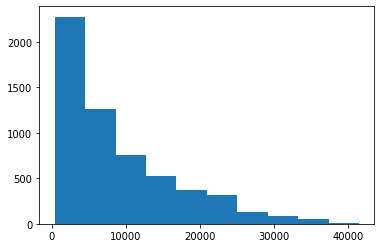

In [23]:
plt.hist(model.predict(X_test))

(array([3177.,  850.,  327.,  746.,  276.,  135.,   84.,   54.,   44.,
          82.]),
 array([   58. ,  5052.2, 10046.4, 15040.6, 20034.8, 25029. , 30023.2,
        35017.4, 40011.6, 45005.8, 50000. ]),
 <BarContainer object of 10 artists>)

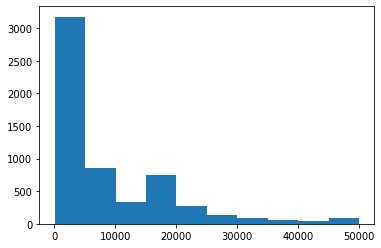

In [24]:
plt.hist(y_test)

In [25]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

ridge = Ridge(alpha=0.2).fit(X_train, y_train)
lasso = Lasso(alpha=0.2).fit(X_train, y_train)

coefs = pd.DataFrame({
    "coef_ridge": pd.Series(ridge.coef_, index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_, index= X.columns)})\

coefs\
    .applymap(lambda x: int(x))\
    .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

,coef_ridge,coef_lasso
topic_0,260,260
topic_1,57,56
topic_2,55,55
topic_3,416,416
topic_4,396,395
topic_5,-533,-533
topic_6,203,203
topic_7,-52,-52
topic_8,-326,-326
topic_9,319,319
